# Midterm Exam Part 2 - Solutions

**Note that this Notebook contains solutions for the extra questions included in the EEL5934 but not in EEL4930.**

In [96]:
# Import all necessary libraries and magics

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline
plt.style.use('bmh')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Question 1 (20 points)

**In this problem, you will be working with the wine dataset that is readily available in ```sklearn.datasets```.**

**This dataset contains 13 numerical attributes. Each sample is labeled as class 0, 1 or 2. Let's load it:**

In [2]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X = wine.data

X

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [4]:
t = wine.target

t.shape

(178,)

**Answer the following questions:**

1. **(2 points) Split the data using a stratified 80/20 random split.**

In [6]:
X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.2,
                                                    stratify=t,
                                                    shuffle=True,
                                                    random_state=0)

X_train.shape, t_train.shape, X_test.shape, t_test.shape

((142, 13), (142,), (36, 13), (36,))

2. **(4 points) Build a ```sklearn``` pipeline to (1) scale the data, and (2) train a Random Forest classifier. Carry the experimental design (pick at least 2 hyperparameters) with a 5-fold cross-validation scheme and accuracy as the performance measure. From the values experimented with, which set returned the best accuracy scores?**

In [7]:
pipe = Pipeline([('scaling', StandardScaler()),
                ('random_forest', RandomForestClassifier())])

pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('random_forest', RandomForestClassifier())],
 'verbose': False,
 'scaling': StandardScaler(),
 'random_forest': RandomForestClassifier(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'random_forest__bootstrap': True,
 'random_forest__ccp_alpha': 0.0,
 'random_forest__class_weight': None,
 'random_forest__criterion': 'gini',
 'random_forest__max_depth': None,
 'random_forest__max_features': 'auto',
 'random_forest__max_leaf_nodes': None,
 'random_forest__max_samples': None,
 'random_forest__min_impurity_decrease': 0.0,
 'random_forest__min_samples_leaf': 1,
 'random_forest__min_samples_split': 2,
 'random_forest__min_weight_fraction_leaf': 0.0,
 'random_forest__n_estimators': 100,
 'random_forest__n_jobs': None,
 'random_forest__oob_score': False,
 'random_forest__random_state': None,
 'random_forest__verbose': 0,
 'random_forest__warm_start': False}

In [10]:
param_grid = {'random_forest__max_depth': list(range(7,15)),
             'random_forest__n_estimators': np.arange(100,501,100)}

grid_search = GridSearchCV(pipe, param_grid, 
                           cv=5, scoring='accuracy',
                          refit=True)

grid_search.fit(X_train, t_train)

print(grid_search.best_params_)

{'random_forest__max_depth': 7, 'random_forest__n_estimators': 100}


In [11]:
# Training final model
final_pipe_rf = grid_search.best_estimator_

final_pipe_rf

Pipeline(steps=[('scaling', StandardScaler()),
                ('random_forest', RandomForestClassifier(max_depth=7))])

3. **(4 points) Use your trained pipeline in (2) to make predictions in the training and test sets. Report accuracy, confusion matrices and the 95% confidence interval. Discuss whether the model might be overfitting. Justify your reasoning.**

In [12]:
# Predicting labels for training/test sets
y_train = final_pipe_rf.predict(X_train)
y_test = final_pipe_rf.predict(X_test)

In [16]:
scores_val = cross_val_score(final_pipe_rf, X_train, t_train,
                            scoring='accuracy', cv=5)

confidence = 0.95
stats.t.interval(confidence,
                 len(scores_val)-1,
                 loc = scores_val.mean(),
                 scale=scores_val.std(ddof=1)/np.sqrt(len(scores_val)))

(0.9347375638514634, 0.9953116972322804)

Training Set Accuracy: 100.0 %


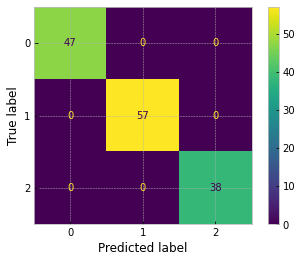

In [20]:
print('Training Set Accuracy:', accuracy_score(t_train, y_train)*100, '%')
ConfusionMatrixDisplay(confusion_matrix(t_train, y_train)).plot();

Test Set Accuracy: 100.0 %


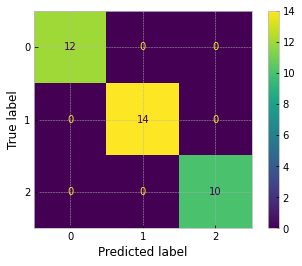

In [21]:
print('Test Set Accuracy:', accuracy_score(t_test, y_test)*100, '%')
ConfusionMatrixDisplay(confusion_matrix(t_test, y_test)).plot();

4. **(4 points) Build a ```sklearn``` pipeline to (1) scale the data, and (2) train a Logistic Regression classifier with *a* regularization penalty term. Carry the experimental design (pick at least 2 hyperparameters) with a 5-fold cross-validation scheme and accuracy as the performance measure. From the values experimented with, which set returned the best accuracy scores?**

In [24]:
pipe = Pipeline([('scaling', StandardScaler()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

pipe.get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()),
  ('log_reg', LogisticRegression(solver='liblinear'))],
 'verbose': False,
 'scaling': StandardScaler(),
 'log_reg': LogisticRegression(solver='liblinear'),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'log_reg__C': 1.0,
 'log_reg__class_weight': None,
 'log_reg__dual': False,
 'log_reg__fit_intercept': True,
 'log_reg__intercept_scaling': 1,
 'log_reg__l1_ratio': None,
 'log_reg__max_iter': 100,
 'log_reg__multi_class': 'auto',
 'log_reg__n_jobs': None,
 'log_reg__penalty': 'l2',
 'log_reg__random_state': None,
 'log_reg__solver': 'liblinear',
 'log_reg__tol': 0.0001,
 'log_reg__verbose': 0,
 'log_reg__warm_start': False}

In [26]:
param_grid = {'log_reg__penalty': ['l1','l2'],
             'log_reg__C': np.linspace(0.0001,5,100)}

grid_search = GridSearchCV(pipe, param_grid, 
                           cv=5, scoring='accuracy',
                          refit=True)

grid_search.fit(X_train, t_train)

print(grid_search.best_params_)

{'log_reg__C': 0.1516121212121212, 'log_reg__penalty': 'l2'}


In [27]:
# Training final model
final_pipe_logreg = grid_search.best_estimator_

final_pipe_logreg

Pipeline(steps=[('scaling', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1516121212121212, solver='liblinear'))])

5. **(4 points) Use your trained pipeline in (4) to make predictions in the training and test sets. Report accuracy, confusion matrices and the 95% confidence interval. Discuss whether the model might be overfitting. Justify your reasoning.**

In [29]:
# Predicting labels for training/test sets
y_train = final_pipe_logreg.predict(X_train)
y_test = final_pipe_logreg.predict(X_test)

In [30]:
scores_val = cross_val_score(final_pipe_logreg, X_train, t_train,
                            scoring='accuracy', cv=5)

confidence = 0.95
stats.t.interval(confidence,
                 len(scores_val)-1,
                 loc = scores_val.mean(),
                 scale=scores_val.std(ddof=1)/np.sqrt(len(scores_val)))

(0.9614254506907766, 1.0100031207377949)

Training Set Accuracy: 99.29577464788733 %


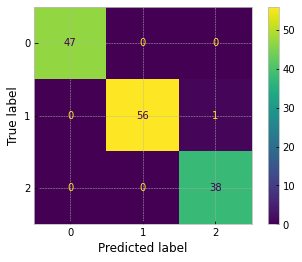

In [31]:
print('Training Set Accuracy:', accuracy_score(t_train, y_train)*100, '%')
ConfusionMatrixDisplay(confusion_matrix(t_train, y_train)).plot();

Test Set Accuracy: 100.0 %


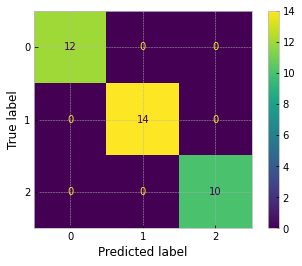

In [32]:
print('Test Set Accuracy:', accuracy_score(t_test, y_test)*100, '%')
ConfusionMatrixDisplay(confusion_matrix(t_test, y_test)).plot();

6. **(2 points) Based on these results, which model would you select?**

The accuracy in training and test sets are identical in both models, but the 95% for the Logistic Regression model includes larger accuracy scores thus Logistic Regression (with the hyperparameter specified above) performs best for this dataset.

---

# Question 2 (30 points)

**In this problem, you will be working with the [Air Quality UCI dataset](). The dataset contains 9358 instances of hourly averaged responses from an array of metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.**

### Attribute Information

0. **Date (DD/MM/YYYY)**
1. **Time (HH.MM.SS)**
2. **True hourly averaged concentration CO in mg/m^3 (reference analyzer)**
3. **PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)**
4. **True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)**
5. **True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)**
6. **PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)**
7. **True hourly averaged NOx concentration in ppb (reference analyzer)**
8. **PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)**
9. **True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)**
10. **PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)**
11. **PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)**
12. **Temperature in Celsius**
13. **Relative Humidity (%)**
14. **AH Absolute Humidity**

**The goal of this problem is to predict the true hourly concentration of CO in mg/m^3.**

1. **(5 points) Load the data. Answer the following questions:**
    * **Are there any missing values?**
    * **Visualize how informative each attribute is in predicting the target variable CO(GT).**
    * **Which attributes are most correlated with the target variable?**

In [67]:
data = pd.read_csv('AirQualityUCI.csv')
data

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1       1314.0       NaN      13.5   
9353   4/4/2005  11:00:00     2.4       1163.0       NaN      11.4   
9354   4/4/2005  12:00:00     2.4       1142.0       NaN      12.4   
9355   4/4/2005  13:00:00     2.1       1003.0       NaN       9.5   
9356   4/4/2005  14:00:00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


There are missing values in all attributes but date and time. Since the target variable CO(GT) only contains 7674, we should drop all samples with missing entries.

In [77]:
new_data=data.dropna(subset=['CO(GT)'])

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7674 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7344 non-null   float64
 4   NMHC(GT)       890 non-null    float64
 5   C6H6(GT)       7344 non-null   float64
 6   PT08.S2(NMHC)  7344 non-null   float64
 7   NOx(GT)        7261 non-null   float64
 8   PT08.S3(NOx)   7344 non-null   float64
 9   NO2(GT)        7258 non-null   float64
 10  PT08.S4(NO2)   7344 non-null   float64
 11  PT08.S5(O3)    7344 non-null   float64
 12  T              7344 non-null   float64
 13  RH             7344 non-null   float64
 14  AH             7344 non-null   float64
dtypes: float64(13), object(2)
memory usage: 959.2+ KB


Once we drop the entries in the target variable ```CO(GT)```, we see that other entries still have a reasonably large number of missing values. For all other, I will use ```SimpleImputer``` to impute the missing values with the median. For the attribute ```NMHC(GT)```, there are too many missing values. I will drop that atttribute.

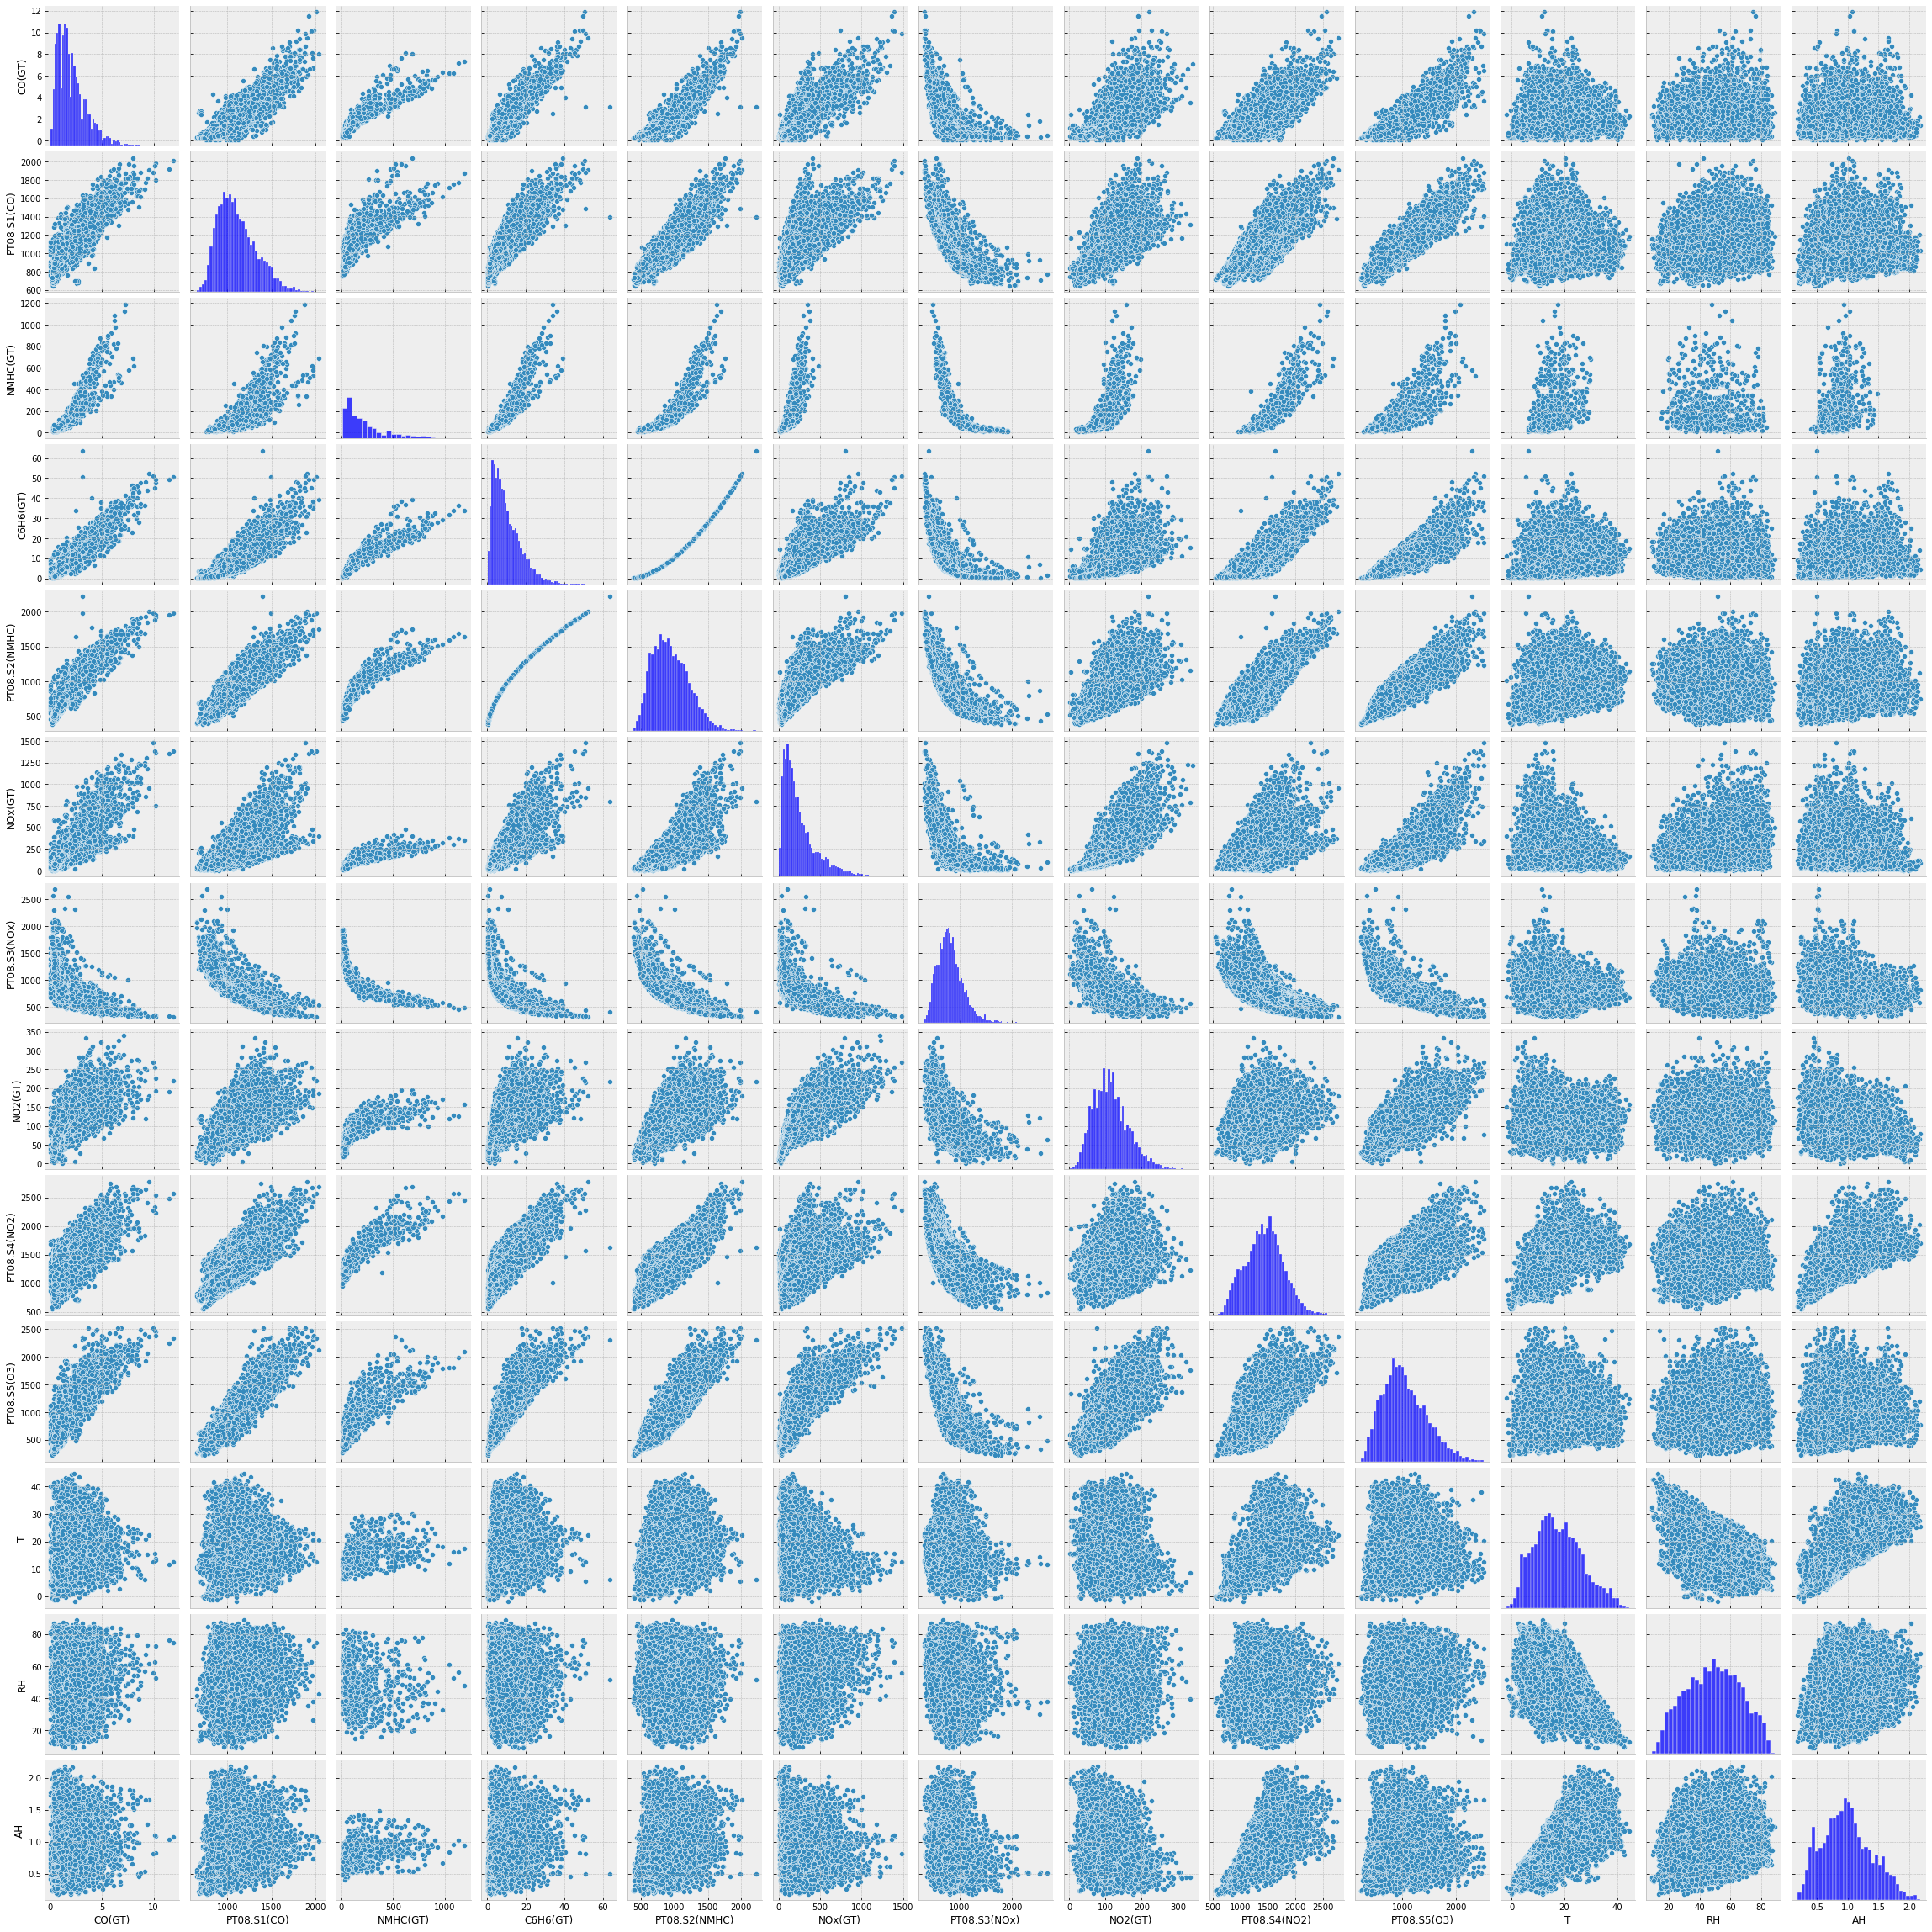

In [78]:
import seaborn

seaborn.pairplot(new_data)

In [79]:
new_data.corr(method='pearson')['CO(GT)']

CO(GT)           1.000000
PT08.S1(CO)      0.879288
NMHC(GT)         0.889734
C6H6(GT)         0.931078
PT08.S2(NMHC)    0.915514
NOx(GT)          0.795028
PT08.S3(NOx)    -0.703446
NO2(GT)          0.683343
PT08.S4(NO2)     0.630703
PT08.S5(O3)      0.854182
T                0.022109
RH               0.048890
AH               0.048556
Name: CO(GT), dtype: float64

Attributes C6H6(GT), PT08.S2(NMHC) and NMHC(GT) have the largest Pearson's correlation with the target response (>0.88).

2. **(5 points) Split your data and build a pipeline to encode and scale your attributes. Disregard attributes ```Date```,  ```Time``` and any other attribute with less than 1000 non-null entries.**

In [80]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7674 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7674 non-null   object 
 1   Time           7674 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    7344 non-null   float64
 4   NMHC(GT)       890 non-null    float64
 5   C6H6(GT)       7344 non-null   float64
 6   PT08.S2(NMHC)  7344 non-null   float64
 7   NOx(GT)        7261 non-null   float64
 8   PT08.S3(NOx)   7344 non-null   float64
 9   NO2(GT)        7258 non-null   float64
 10  PT08.S4(NO2)   7344 non-null   float64
 11  PT08.S5(O3)    7344 non-null   float64
 12  T              7344 non-null   float64
 13  RH             7344 non-null   float64
 14  AH             7344 non-null   float64
dtypes: float64(13), object(2)
memory usage: 959.2+ KB


In [101]:
# Defining feature matrix X and target variable t

t = new_data['CO(GT)']

X = new_data.drop(['CO(GT)'], axis=1)

t.shape, X.shape

((7674,), (7674, 14))

In [102]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((6139, 14), (1535, 14), (6139,), (1535,))

In [116]:
# List of numerical attributes, disregarding "NMHC(GT)"
num_attribs = ['PT08.S1(CO)']+list(data.columns[5:])

# Pipeline for numerical attributes to (1) filling missing values with the median and (2) scale them
num_pipeline = Pipeline([('missing_values',SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())]) 

# Preprocessing Pipeline
preprocessing_pipeline = ColumnTransformer([('num_attribs', num_pipeline, num_attribs)],
                                          remainder='drop') 

# Train the pipeline
# preprocessing_pipeline.fit(X_train)

3. **(5 points) Train a Linear Regression algorithm with polynomial features of order $M$ and Lasso regularizer.**

**Perform hyperparameter tuning to determine which value of $M$ and $\lambda$ best work for this data. Use $r^2$ as your performance measure and a 10-fold CV strategy.**

**_Note: You may set ```tol=2``` in ```Lasso``` to avoid convergence warnings._**

In [127]:
# Pipeline for Linear Regression with Polynomial Features and Lasso Regularizer
pol_lin_reg = Pipeline([('poly_feat', PolynomialFeatures()),
                       ('lin_reg_lasso', Lasso(tol=2))])

# Full pipeline: Preprocessing + Model
full_pipeline = Pipeline([('preprocessing', preprocessing_pipeline),
                         (['model', pol_lin_reg])])

full_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num_attribs',
                                    Pipeline(steps=[('missing_values',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler())]),
                                    ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                                     'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
                                     'AH'])])),
  ['model',
   Pipeline(steps=[('poly_feat', PolynomialFeatures()),
                   ('lin_reg_lasso', Lasso(tol=2))])]],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num_attribs',
                                  Pipeline(steps=[('missing_values',
                                          

In [128]:
param_grid = {'model__poly_feat__degree': range(1,5),
             'model__lin_reg_lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 0.2]}

grid_search = GridSearchCV(full_pipeline, param_grid, 
                           cv=10, scoring='r2',
                          refit=True)

grid_search.fit(X_train, t_train)

print(grid_search.best_params_)

{'model__lin_reg_lasso__alpha': 0.0001, 'model__poly_feat__degree': 4}


The hyperparameter search should not be exhaustive. Based on these results, in practice, we should go back and increase the range of values <0.0001 since the optimal value lands on the edge of the options provided.

In [129]:
final_model = grid_search.best_estimator_

final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_attribs',
                                                  Pipeline(steps=[('missing_values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['PT08.S1(CO)', 'C6H6(GT)',
                                                   'PT08.S2(NMHC)', 'NOx(GT)',
                                                   'PT08.S3(NOx)', 'NO2(GT)',
                                                   'PT08.S4(NO2)',
                                                   'PT08.S5(O3)', 'T', 'RH',
                                                   'AH'])])),
                ['model',
                 Pipeline(steps=[('poly_feat', PolynomialFeatures(degree=4)),


4. **(4 points) Report the $r^2$ for training and test sets, and the 95% CI in validation.**

In [130]:
y_train = final_model.predict(X_train)

y_test = final_model.predict(X_test)

In [131]:
print('Training r^2:', r2_score(t_train, y_train))

scores_val = cross_val_score(final_model, X_train, t_train,
                            scoring='r2', cv=10)
confidence = 0.95
print('95% CI:', stats.t.interval(confidence,
                                 len(scores_val)-1,
                                 loc = scores_val.mean(),
                                 scale=scores_val.std(ddof=1)/np.sqrt(len(scores_val))))

print('Test r^2:', r2_score(t_test, y_test))

Training r^2: 0.8663435932607797
95% CI: (0.852998558572396, 0.8680867800806265)
Test r^2: 0.8486661238853083


5. **(5 points) Train a Random Forest regressor. Perform hyperparameter tuning to determine which value for the best number of trees and maximum depth best work for this data. Use $r^2$ as your performance measure and a 10-fold CV strategy.**

In [132]:
# Pipeline for Linear Regression with Polynomial Features and Lasso Regularizer
RF_reg = Pipeline([('RF_regressor', RandomForestRegressor())])

# Full pipeline: Preprocessing + Model
full_pipeline = Pipeline([('preprocessing', preprocessing_pipeline),
                         (['model', RF_reg])])

full_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num_attribs',
                                    Pipeline(steps=[('missing_values',
                                                     SimpleImputer(strategy='median')),
                                                    ('std_scaler',
                                                     StandardScaler())]),
                                    ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                                     'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                                     'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
                                     'AH'])])),
  ['model', Pipeline(steps=[('RF_regressor', RandomForestRegressor())])]],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num_attribs',
                                  Pipeline(steps=[('missing_values',
                                                   SimpleImputer(strategy='median')),
     

In [136]:
param_grid = {'model__RF_regressor__n_estimators': [50,100],
             'model__RF_regressor__max_depth': [2,4,6]}

grid_search = GridSearchCV(full_pipeline, param_grid, 
                           cv=10, scoring='r2',
                          refit=True)

grid_search.fit(X_train, t_train)

print(grid_search.best_params_)

{'model__RF_regressor__max_depth': 6, 'model__RF_regressor__n_estimators': 50}


The hyperparameter search should not be exhaustive. Since the optimal value lands on the edge of the options provided, we should go back and extend the search space beyond those values.

In [137]:
final_model = grid_search.best_estimator_

final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_attribs',
                                                  Pipeline(steps=[('missing_values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['PT08.S1(CO)', 'C6H6(GT)',
                                                   'PT08.S2(NMHC)', 'NOx(GT)',
                                                   'PT08.S3(NOx)', 'NO2(GT)',
                                                   'PT08.S4(NO2)',
                                                   'PT08.S5(O3)', 'T', 'RH',
                                                   'AH'])])),
                ['model',
                 Pipeline(steps=[('RF_regressor',
                            

6. **(4 points) Report the $r^2$ for training and test sets, and the 95% CI in validation.**

In [138]:
y_train = final_model.predict(X_train)

y_test = final_model.predict(X_test)

In [139]:
print('Training r^2:', r2_score(t_train, y_train))

scores_val = cross_val_score(final_model, X_train, t_train,
                            scoring='r2', cv=10)
confidence = 0.95
print('95% CI:', stats.t.interval(confidence,
                                 len(scores_val)-1,
                                 loc = scores_val.mean(),
                                 scale=scores_val.std(ddof=1)/np.sqrt(len(scores_val))))

print('Test r^2:', r2_score(t_test, y_test))

Training r^2: 0.9238031679943277
95% CI: (0.8927367822180641, 0.9112395230689103)
Test r^2: 0.9043599881276887


7. **(2 points) Based on the results you obtain from the previous problems, which model (polynomial linear regression with Lasso penalty or Random Forest regressor) would you select? Explain your reasoning.**

Based on these results, the random forest regressor performs best in training and test sets and produces the best 95% CI in the validation set.

---